
<img src="https://lh3.googleusercontent.com/DS4BHTkXT_9FzxuOd67PNjJT-o87kdtvP42wq_JUzQz8oWhzOOxWKu0CAkTSzBzyLKrYNWAF8dAY6FUSgjLJFBBrMjHz_cdk9-i0QhAOnIdo8Nq3192BdGxlEUwRRpCzkp_iBiIK" alt="drawing" width="3000" height="100"/>

## Table of Contents

  1. <a href='#load'>Loading libraries and tha data</a>
  2. [Dataset Information](#data)
      - [Attribute Information](#attr)
  3. [Data Preparation](#prep) 
      - [Data size and structure of the drug dataset](#structure)
      - [Visualization](#vis)
  4. [Analysis](#analysis)
      - [Principal Component Analysis (PCA)](#pca)
      - [K-means Clustering](#kmeans)
      - [DBSCAN Clustering](#dbscan)


<a id='load'></a>

## Loading libraries and tha data

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN


%matplotlib inline
sns.reset_orig()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("unsupervised/ChemicalComposionofCeramic.csv")
df.head()

Ceramic Name  Part  Na2O   MgO  Al2O3   SiO2   K2O   CaO  TiO2  Fe2O3  MnO  \
0      FLQ-1-b  Body  0.62  0.38  19.61  71.99  4.84  0.31  0.07   1.18  630   
1      FLQ-2-b  Body  0.57  0.47  21.19  70.09  4.98  0.49  0.09   1.12  380   
2      FLQ-3-b  Body  0.49  0.19  18.60  74.70  3.47  0.43  0.06   1.07  420   
3      FLQ-4-b  Body  0.89  0.30  18.01  74.19  4.01  0.27  0.09   1.23  460   
4      FLQ-5-b  Body  0.03  0.36  18.41  73.99  4.33  0.65  0.05   1.19  380   

   CuO  ZnO  PbO2  Rb2O  SrO  Y2O3  ZrO2  P2O5  
0   10   70    10   430    0    40    80    90  
1   20   80    40   430  -10    40   100   110  
2   20   50    50   380   40    40    80   200  
3   20   70    60   380   10    40    70   210  
4   40   90    40   360   10    30    80   150

## Dataset Information
---
<a id='data'></a>
The energy dispersive X-ray fluorescence (EDXRF) was used to determine the chemical composition of celadon body and glaze in Longquan kiln (at Dayao County) and Jingdezhen kiln. Forty typical shards in four cultural eras were selected to investigate the raw materials and firing technology. We hope to identify chemical elements that are strongest explanatory variables to classify samples into different cultural eras and kilns.

 ### Attribute Information
___
<a id='attr'></a>
Ceramic.Name: name of ceramic types from Longquan and Jindgezhen  
Part: a binary categorical variable ('Body' or 'Glaze')  
Na2O: percentage of Na2O (wt%)   
MgO: percentage of MgO (wt%)   
Al2O3: percentage of AI2O3 (wt%)   
SiO2: percentage of SiO2 (wt%)   
K2O: percentage of K2O (wt%)   
CaO: percentage of CaO (wt%)   
TiO2: percentage of TiO2 (wt%)  
Fe2O3: percentage of Fe2O3 (wt%)  
MnO: percentage of MnO (ppm)   
CuO: percentage of CuO (ppm)   
ZnO: percentage of ZnO (ppm)    
PbO2: percentage of PbO2 (ppm)    
Rb2O: percentage of Rb2O (ppm)    
SrO: percentage of SrO (ppm)    
Y2O3: percentage of Y2O3 (ppm)    
ZrO2: percentage of ZrO2 (ppm)    
P2O5: percentage of P2O5 (ppm)    

<a id='prep'></a>
## Data Preparation 
---

### Data size and structure of the drug dataset
<a id='structure'></a>

In [3]:
df.shape

(88, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

In [5]:
df.describe().T

count        mean         std     min       25%      50%       75%  \
Na2O    88.0    0.471705    0.348779    0.03    0.2475    0.375    0.6425   
MgO     88.0    0.430114    0.215030    0.07    0.2700    0.405    0.5300   
Al2O3   88.0   17.460909    4.703422   11.30   13.0075   16.205   21.7075   
SiO2    88.0   69.825114    2.754377   63.88   67.7375   69.990   71.8400   
K2O     88.0    4.978409    0.879467    2.73    4.3375    5.065    5.5900   
CaO     88.0    4.171818    4.305801    0.12    0.1800    2.690    7.9125   
TiO2    88.0    0.101250    0.053430    0.04    0.0700    0.080    0.1300   
Fe2O3   88.0    1.561591    0.604276    0.58    1.0975    1.510    1.9250   
MnO     88.0  818.750000  614.240607  180.00  380.0000  590.000  982.5000   
CuO     88.0   30.909091   19.096630    0.00   20.0000   30.000   40.0000   
ZnO     88.0   95.340909   33.901441   20.00   70.0000   90.000  112.5000   
PbO2    88.0   38.522727   26.589246    0.00   20.0000   30.000   60.0000   
Rb2O    88.0  310.454545   69.809414  180.00  250.0000  320.000  370.0000   
SrO     88.0  228.863636  256.216646  -10.00   10.0000   75.000  482.5000   
Y2O3    88.0   42.954545   12.879556   20.00   30.0000   40.000   50.0000   
ZrO2    88.0  145.454545   60.074840   50.00  100.0000  140.000  170.0000   
P2O5    88.0  440.909091  402.653944   50.00   97.5000  365.000  697.5000   

           max  
Na2O      1.88  
MgO       1.32  
Al2O3    26.48  
SiO2     75.95  
K2O       6.74  
CaO      13.69  
TiO2      0.29  
Fe2O3     3.11  
MnO    2970.00  
CuO      80.00  
ZnO     230.00  
PbO2    100.00  
Rb2O    450.00  
SrO     780.00  
Y2O3     80.00  
ZrO2    390.00  
P2O5   1610.00

In [6]:
df['Part'].unique()

array(['Body', 'Glaze'], dtype=object)

<AxesSubplot:xlabel='Part', ylabel='count'>

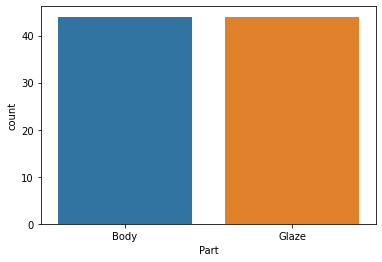

In [158]:
sns.countplot(df['Part'])

From the data we already know that there are two parts. Our aim is to obtain two clusters with right ceramics as accurate as possible by using chemical compositions. So first we will start by removing 'Part' and 'Ceramic name' columns. After our analysis, we will use these two columns to evaluate our models.  

In [8]:
df.columns

Index(['Ceramic Name', 'Part', 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO',
       'TiO2', 'Fe2O3', 'MnO', 'CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3',
       'ZrO2', 'P2O5'],
      dtype='object')

In [9]:
Features = ['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO',
       'TiO2', 'Fe2O3', 'MnO', 'CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3',
       'ZrO2', 'P2O5']

In [10]:
X = df[Features]
X

Na2O   MgO  Al2O3   SiO2   K2O    CaO  TiO2  Fe2O3   MnO  CuO  ZnO  PbO2  \
0   0.62  0.38  19.61  71.99  4.84   0.31  0.07   1.18   630   10   70    10   
1   0.57  0.47  21.19  70.09  4.98   0.49  0.09   1.12   380   20   80    40   
2   0.49  0.19  18.60  74.70  3.47   0.43  0.06   1.07   420   20   50    50   
3   0.89  0.30  18.01  74.19  4.01   0.27  0.09   1.23   460   20   70    60   
4   0.03  0.36  18.41  73.99  4.33   0.65  0.05   1.19   380   40   90    40   
..   ...   ...    ...    ...   ...    ...   ...    ...   ...  ...  ...   ...   
83  0.34  0.55  12.37  70.70  5.33   8.06  0.06   1.61  1250   10   90    30   
84  0.72  0.34  12.20  72.19  6.19   6.06  0.04   1.27  1700   60  110    10   
85  0.23  0.24  12.99  71.81  5.25   7.15  0.05   1.29   750   40  100     0   
86  0.14  0.46  12.62  69.16  4.34  11.03  0.05   1.20   920   40   90    20   
87  0.14  0.63  14.25  71.55  4.87   6.43  0.08   1.05   800   40   90    20   

    Rb2O  SrO  Y2O3  ZrO2  P2O5  
0    430    0    40    80    90  
1    430  -10    40   100   110  
2    380   40    40    80   200  
3    380   10    40    70   210  
4    360   10    30    80   150  
..   ...  ...   ...   ...   ...  
83   250  520    30   140   690  
84   270  540    40   120   630  
85   240  470    40   120   480  
86   230  470    40   130  1100  
87   220  410    40   110   690  

[88 rows x 17 columns]

### Visualization
<a id='vis'></a>

<AxesSubplot:>

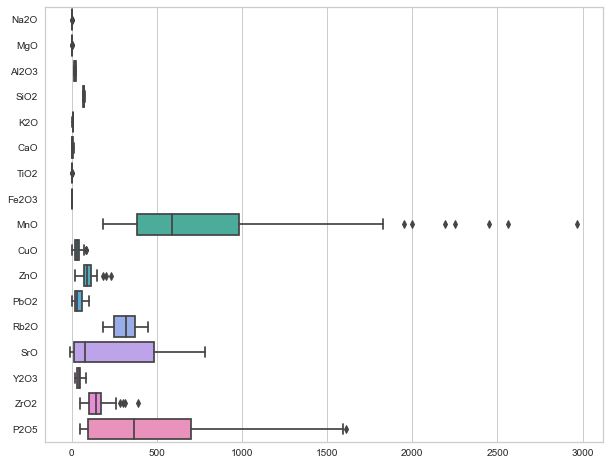

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=X, orient="h")

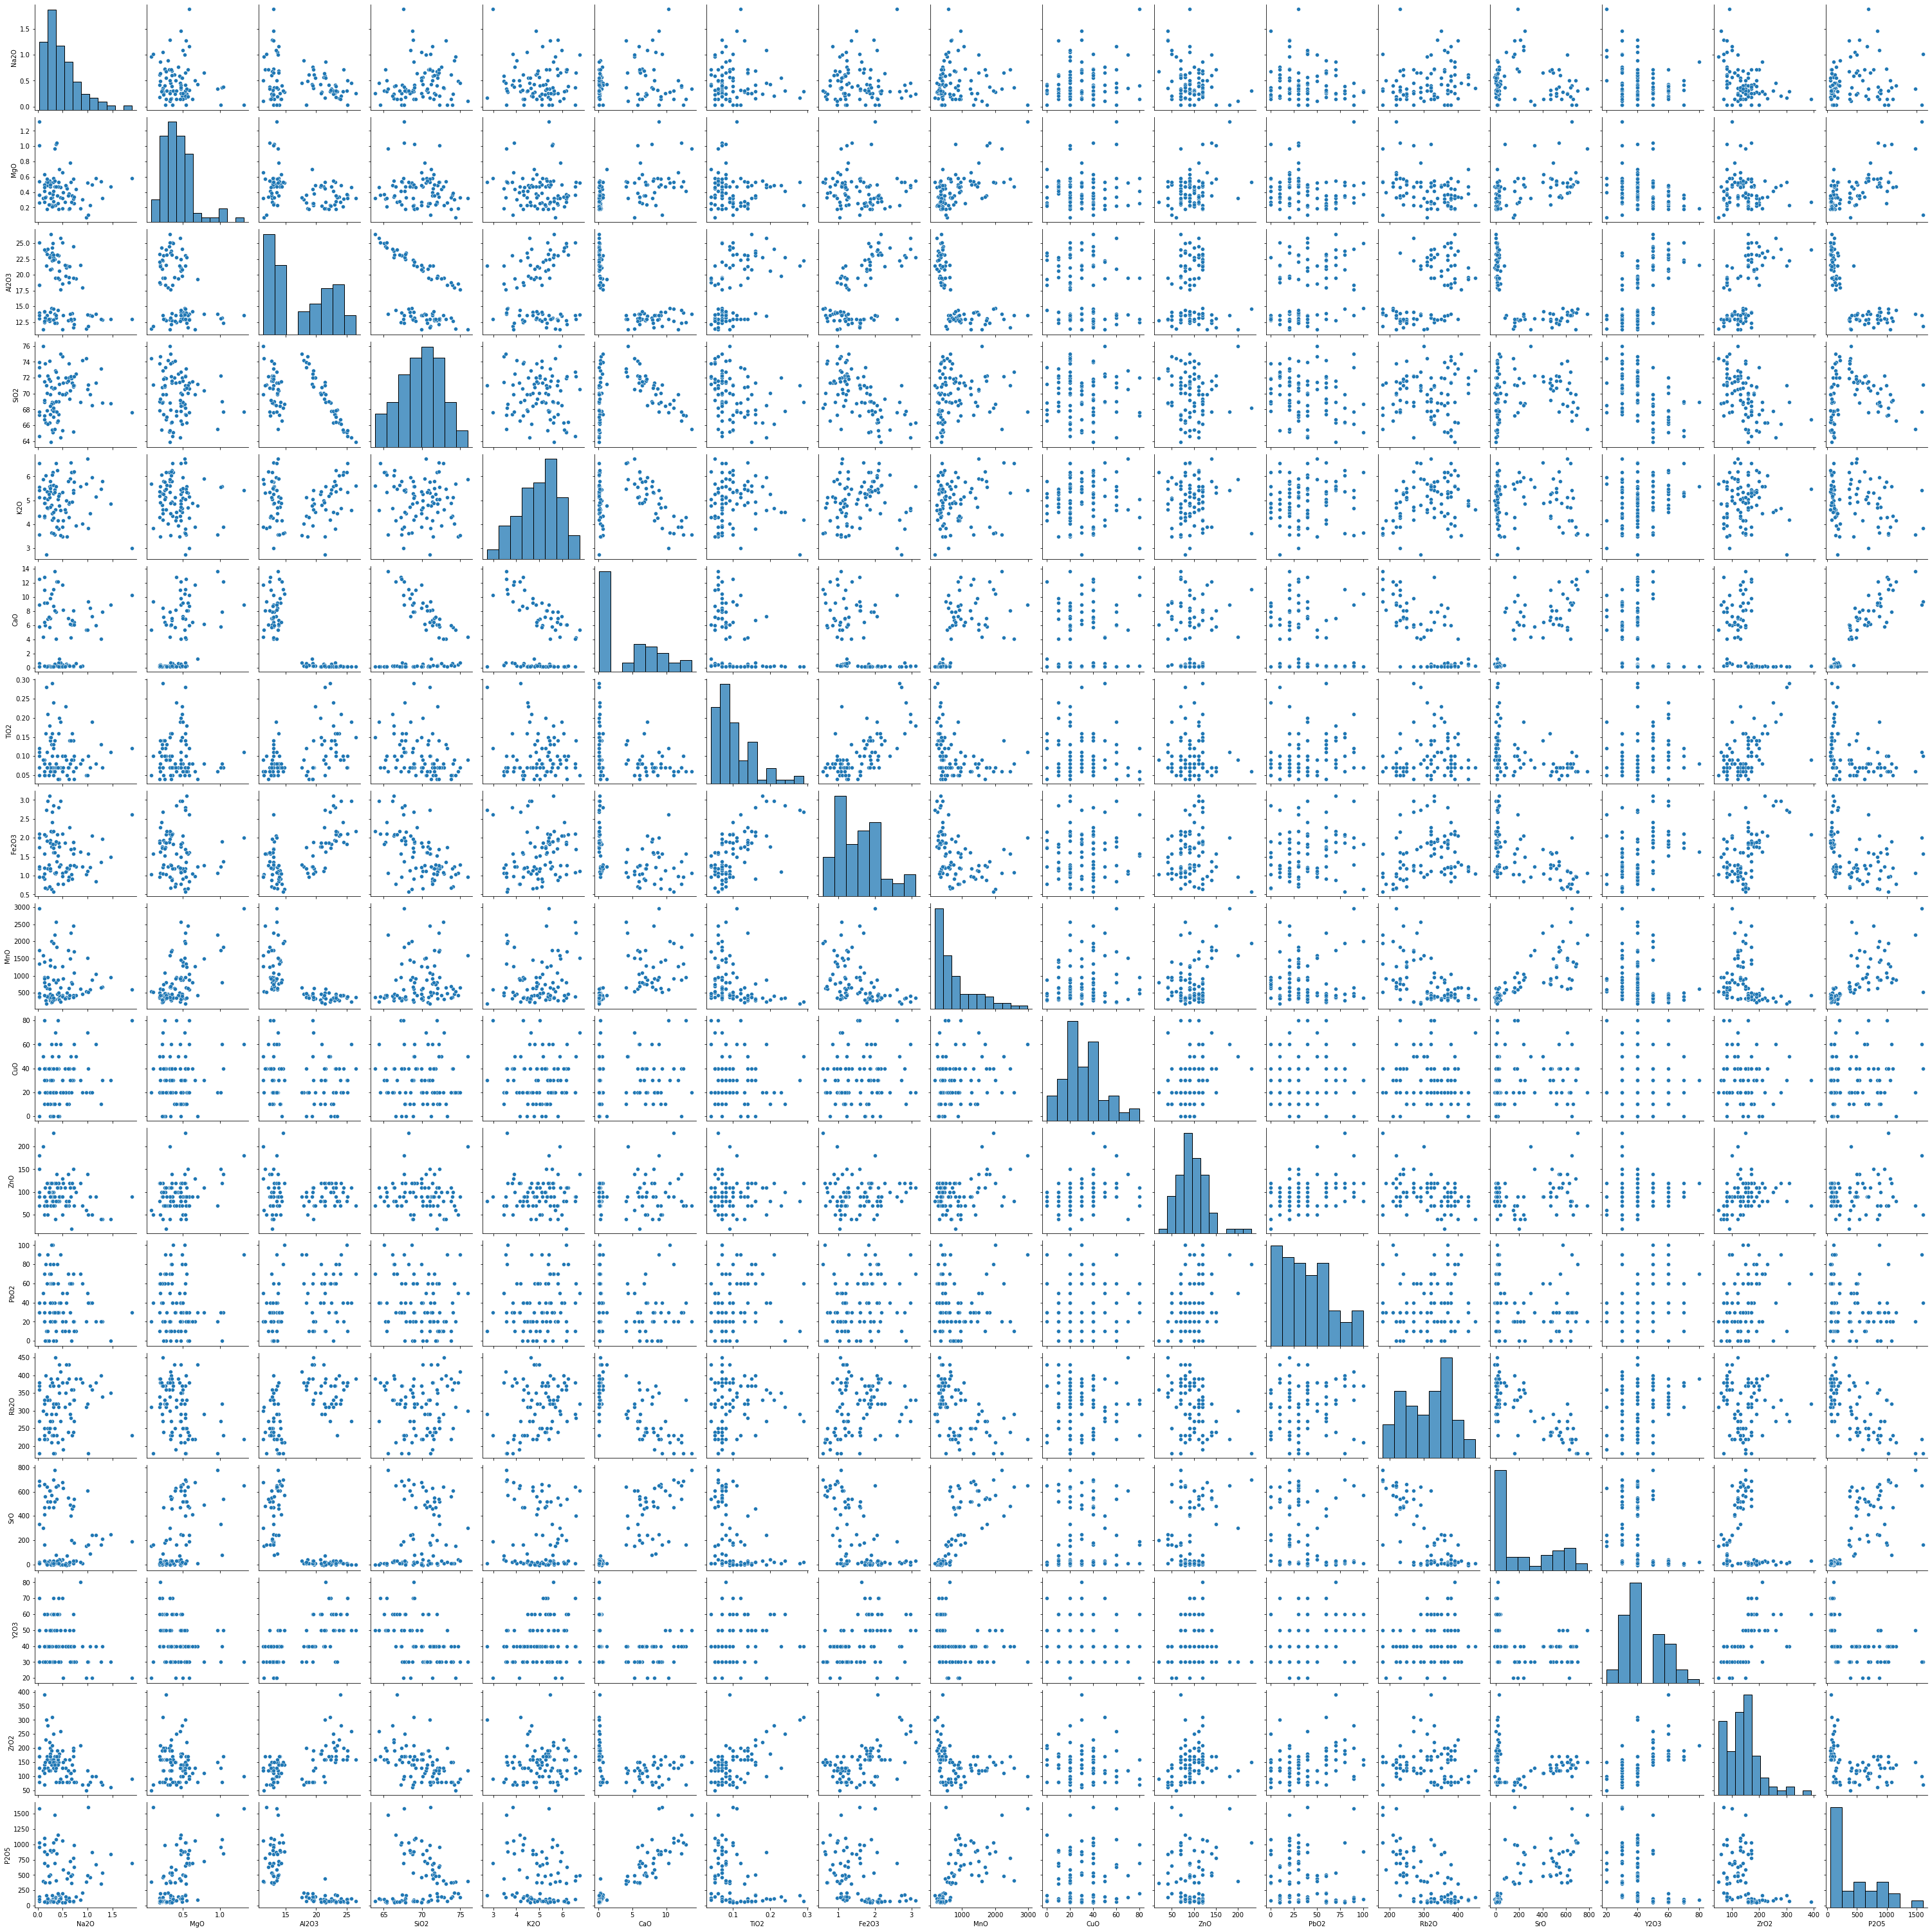

In [20]:
sns.pairplot(X)

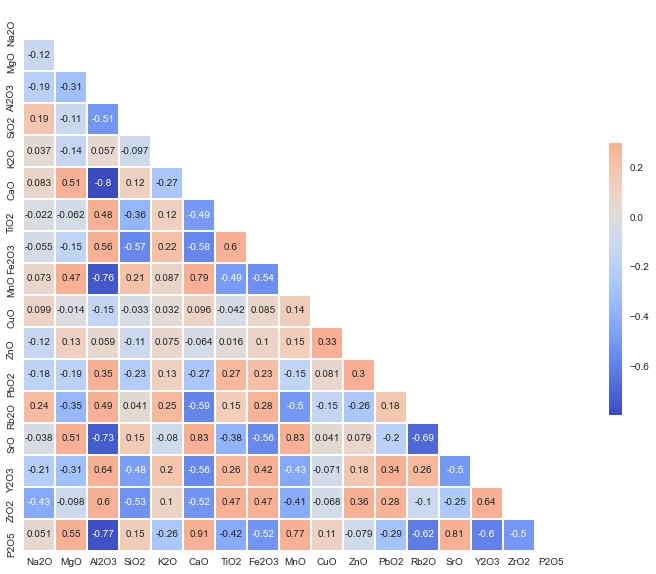

In [12]:
corr = X.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

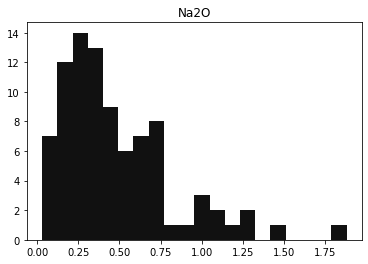

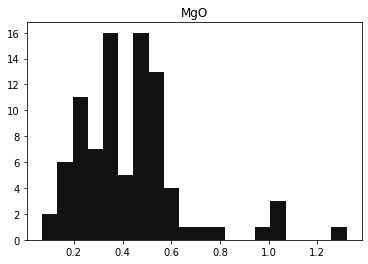

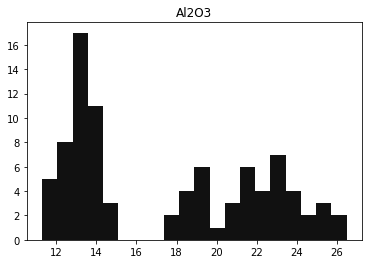

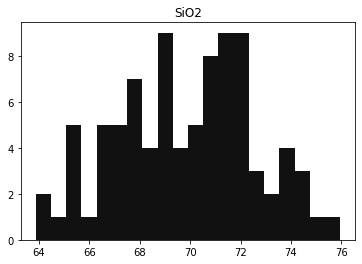

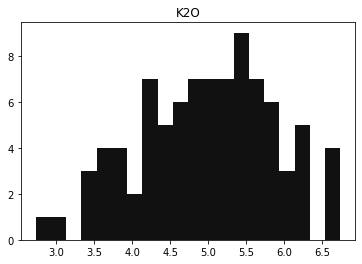

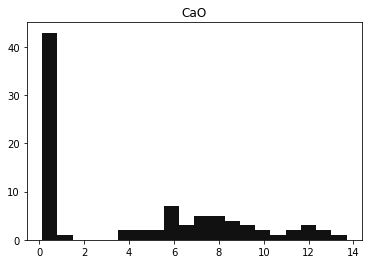

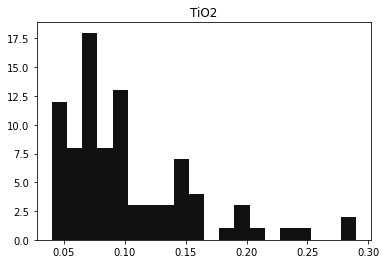

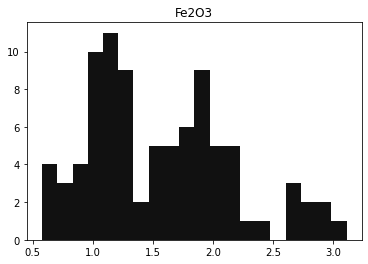

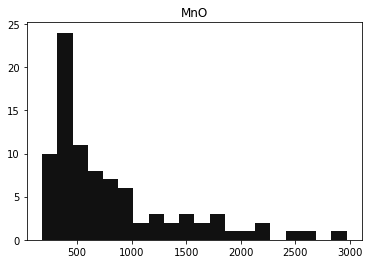

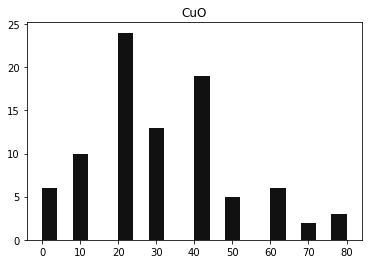

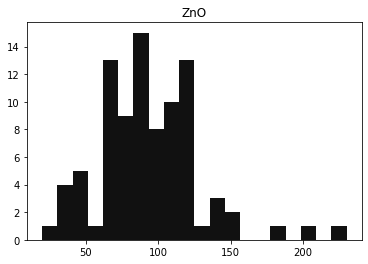

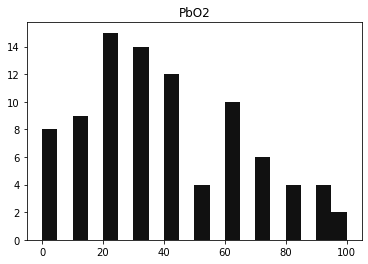

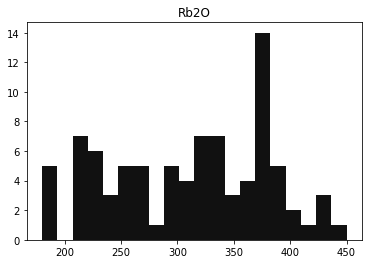

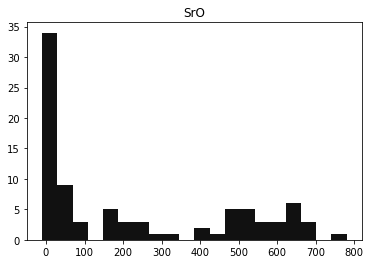

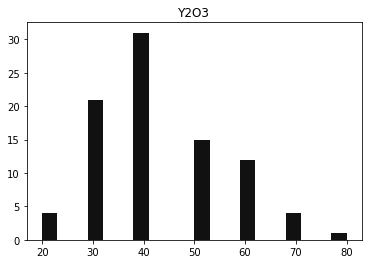

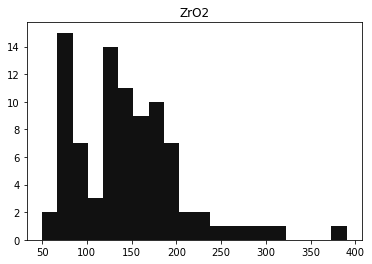

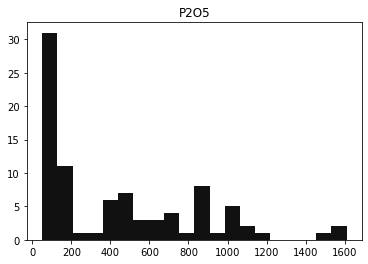

In [159]:
for col in X.columns:      
    df.hist(column=col,bins=20, grid=False, color='k')

# Analysis
---
<a id='analysis'></a>

## Feature Scaling
<a id='feat'></a>

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=Features)
X_scaled.head()

Na2O       MgO     Al2O3      SiO2       K2O       CaO      TiO2  \
0  0.427622 -0.234390  0.459539  0.790484 -0.158280 -0.902027 -0.588232   
1  0.283443  0.186555  0.797390  0.096720  0.001819 -0.859984 -0.211763   
2  0.052756 -1.123051  0.243571  1.780011 -1.724969 -0.873998 -0.776466   
3  1.206188 -0.608563  0.117412  1.593790 -1.107442 -0.911370 -0.211763   
4 -1.273690 -0.327933  0.202944  1.520763 -0.741500 -0.822611 -0.964700   

      Fe2O3       MnO       CuO       ZnO      PbO2      Rb2O       SrO  \
0 -0.635104 -0.309051 -1.101185 -0.751771 -1.078864  1.722268 -0.898362   
1 -0.734965 -0.718390 -0.574531 -0.455108  0.055877  1.722268 -0.937615   
2 -0.818183 -0.652896 -0.574531 -1.345098  0.434125  1.001928 -0.741349   
3 -0.551886 -0.587402 -0.574531 -0.751771  0.812372  1.001928 -0.859108   
4 -0.618460 -0.718390  0.478776 -0.158445  0.055877  0.713792 -0.859108   

       Y2O3      ZrO2      P2O5  
0 -0.230713 -1.095794 -0.876485  
1 -0.230713 -0.760968 -0.826530  
2 -0.230713 -1.095794 -0.601732  
3 -0.230713 -1.263207 -0.576754  
4 -1.011586 -1.095794 -0.726619

## Principal Component Analysis (PCA)
<a id='pca'></a>

In [29]:
pca = PCA(svd_solver='auto') #Here we are using auto solver 
pca.fit(X_scaled)
pca.n_components_ #number of principal components


17

We have 17 principal components, but amount of variance explained by each of them is different.  


[3.67880533e-01 1.58243470e-01 8.86942868e-02 7.81402438e-02
 6.60074033e-02 5.04550588e-02 4.58489998e-02 4.18438267e-02
 2.84785187e-02 2.08567381e-02 1.49233642e-02 1.18870263e-02
 1.02752753e-02 8.22300278e-03 5.59207682e-03 2.65010417e-03
 7.19058347e-08]


Text(0, 0.5, '% Variance Explained')

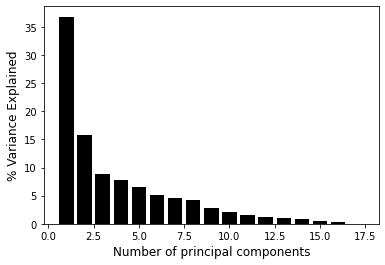

In [40]:
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

plt.bar(np.arange(1,pca.n_components_+1),var_ratio*100,color='black')
plt.xlabel('Number of principal components',fontsize=12)
plt.ylabel('% Variance Explained',fontsize=12)

[ 36.7880533   52.61240026  61.48182894  69.29585331  75.89659364
  80.94209952  85.52699951  89.71138217  92.55923404  94.64490785
  96.13724427  97.3259469   98.35347443  99.17577471  99.73498239
  99.99999281 100.        ]


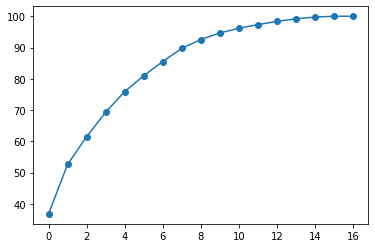

In [50]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_var*100)

plt.plot(cum_var*100, marker='o')


Text(0, 0.5, 'PCA2')

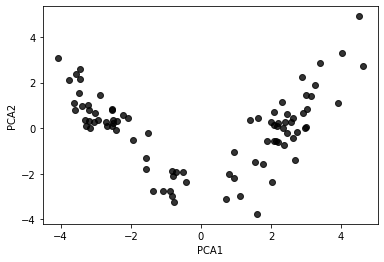

In [156]:
principalComponents = pca.fit_transform(X_scaled)
pc = pd.DataFrame(principalComponents)
plt.scatter(pc[0], pc[1], alpha=.8, color='black')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

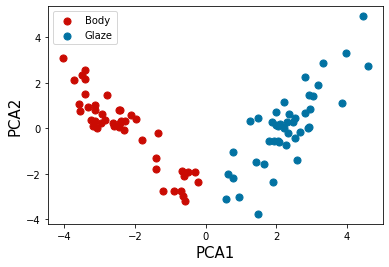

In [155]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
targets = ['Body', 'Glaze']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['Part'] == target
    ax.scatter(pc.loc[indicesToKeep, 0]
               , pc.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)

In [56]:
pd.DataFrame(principalComponents)

0         1         2         3         4         5         6   \
0  -0.912234 -2.765443 -0.304799 -0.639561 -0.355095  0.627767  0.821698   
1  -1.411519 -1.805899 -0.468138 -0.121907 -0.174140  0.494494  1.298071   
2  -0.651623 -2.965724 -0.289002 -1.096660  1.527254 -0.507117  1.121044   
3  -0.714295 -2.738676 -0.236085  0.022313  1.240169  0.209553  1.177127   
4  -0.311341 -1.908659 -1.013638 -0.511691  1.682317  0.034813  0.661875   
..       ...       ...       ...       ...       ...       ...       ...   
83  2.300114  0.264010  0.051133 -0.951785 -0.646082  0.719813 -0.294805   
84  2.520471 -0.439616 -1.251611  1.304704 -0.580816 -0.354576 -1.844779   
85  1.777511 -0.576168 -0.366908 -0.659589  0.085212 -0.861191 -1.628737   
86  2.817251  0.660629  0.541807 -0.722864 -0.045656 -1.383256 -0.055896   
87  2.096585  0.210622  0.008561 -0.685801  0.282429 -0.140432 -0.255840   

          7         8         9         10        11        12        13  \
0   0.782986 -0.604403 -0.084930 -0.164931 -0.133328  0.494341  0.178565   
1   0.392702 -0.106853  0.086213 -0.637935  0.470041  0.140042  0.045226   
2  -0.278314  0.407531 -0.522357  0.123841 -0.622582  0.307475 -0.184643   
3  -0.865789 -0.246173 -0.533907  0.149774 -0.268607 -0.001098 -0.408035   
4   1.240937  1.047612  0.577988  0.099078 -0.216780  0.058090 -0.175429   
..       ...       ...       ...       ...       ...       ...       ...   
83 -0.285105  0.125871  0.647385  0.076565 -0.737298 -0.451724  0.085827   
84  0.528907 -0.197997 -0.298690 -0.011816 -0.456702  0.255949 -0.055612   
85  0.857872  0.063863  0.518486  0.491670  0.020203 -0.038850 -0.027521   
86  0.503461  0.626705  0.301816  0.503925  0.171125 -0.180824  0.354206   
87  0.986110  0.597638 -0.129060  0.316873  0.474318 -0.410807 -0.807650   

          14        15        16  
0   0.063001  0.081752 -0.000304  
1   0.141133  0.109848  0.000167  
2  -0.027426 -0.160293  0.001444  
3   0.048989 -0.127605 -0.001171  
4  -0.098927  0.160054  0.001186  
..       ...       ...       ...  
83 -0.307255 -0.048603  0.002250  
84  0.044656 -0.288746  0.001125  
85 -0.496068 -0.153336  0.000280  
86  0.047336 -0.101243 -0.000656  
87 -0.038097  0.092835 -0.000573  

[88 rows x 17 columns]

## K-means Clustering
<a id='kmeans'></a>

In [66]:
#Plotting Elbow Curve
distortion_score=[]

for i in range(1,11): #Max number of clusters is just an assumption here (n=10) 
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    distortion_score.append(kmeans.inertia_)

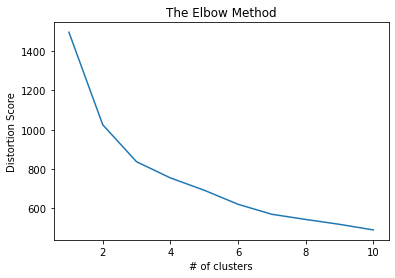

In [67]:
plt.plot(range(1,11), distortion_score)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('Distortion Score')
plt.show()

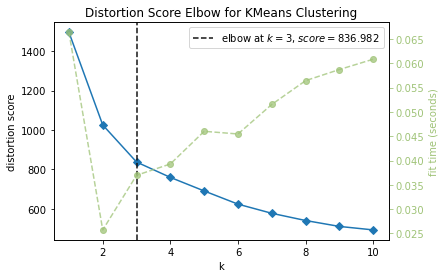

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
## Fancier way to plot elbow plot
model = KMeans()
e_plot = KElbowVisualizer(model, k=(1,11))
e_plot.fit(X_scaled)    
e_plot.poof()

In [69]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
X_scaled['KMeans'] = kmeans.predict(X_scaled)

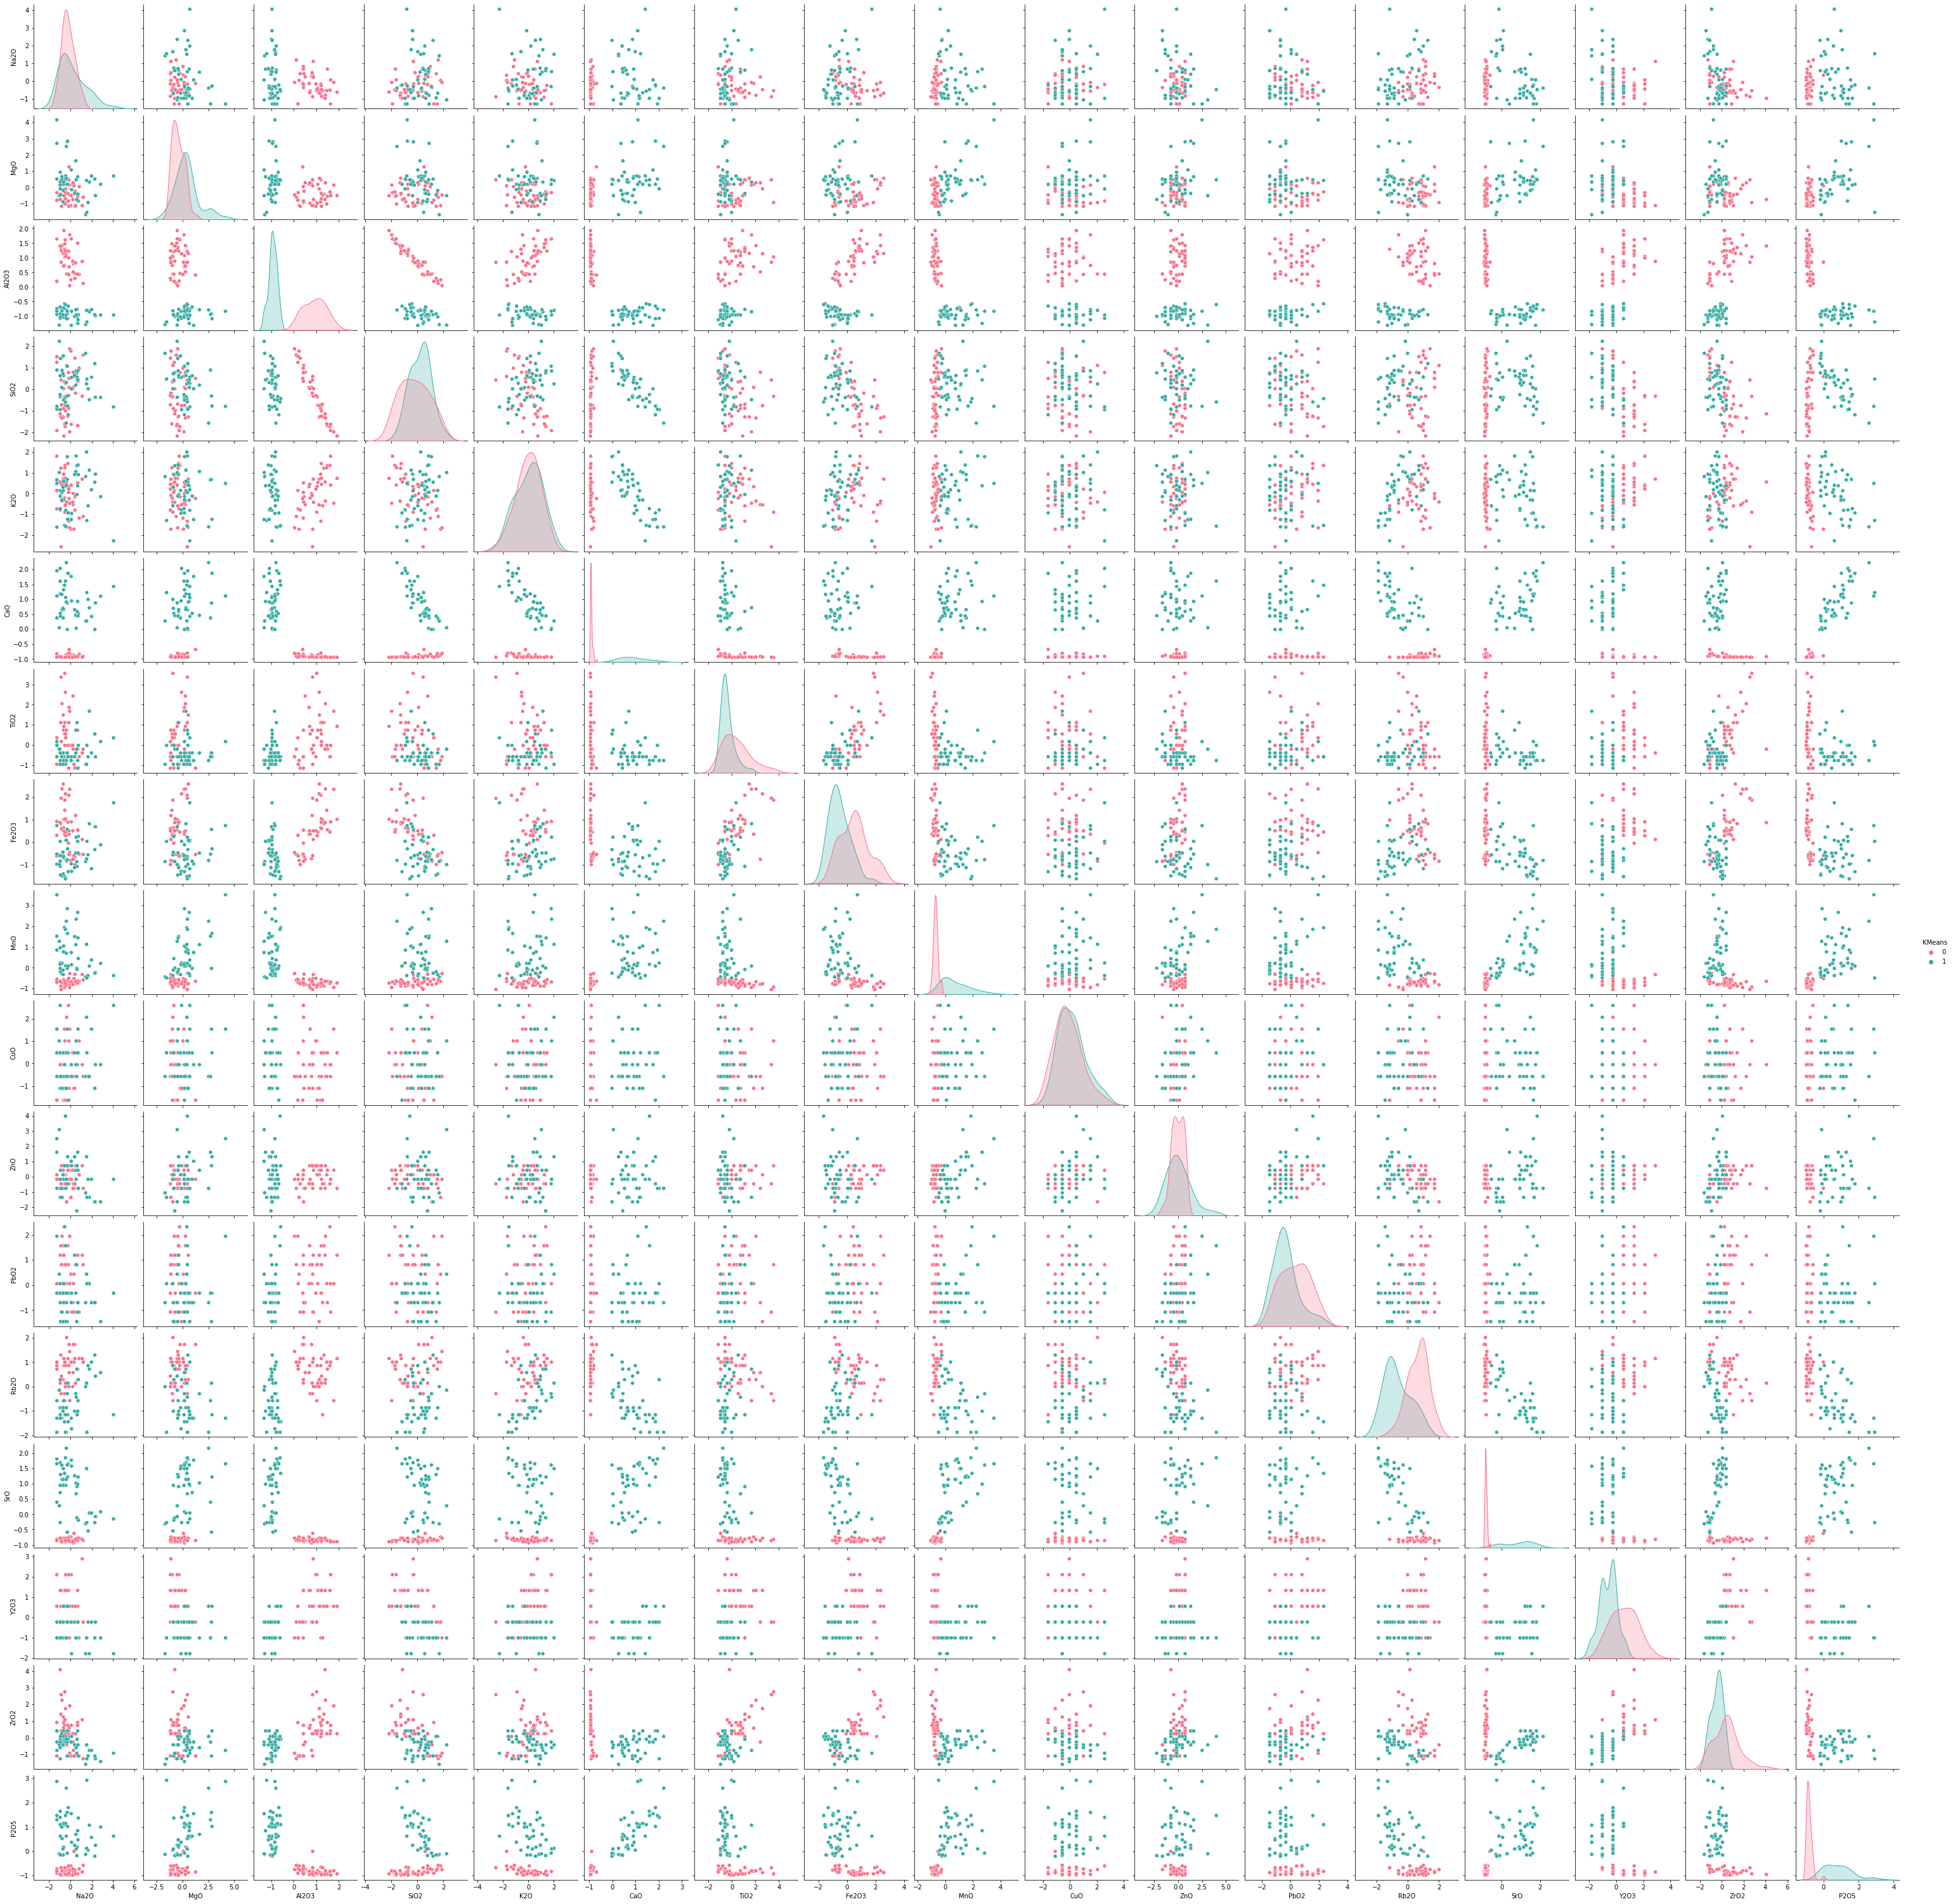

In [70]:
num_clusters = X_scaled['KMeans'].nunique()
sns.pairplot(X_scaled, hue='KMeans', palette=sns.color_palette("husl", num_clusters))


In [73]:
part_numeric = {'Body':0, 'Glaze':1}
X_scaled['Part'] = df['Part'].map(part_numeric)
X_scaled.head()

Na2O       MgO     Al2O3      SiO2       K2O       CaO      TiO2  \
0  0.427622 -0.234390  0.459539  0.790484 -0.158280 -0.902027 -0.588232   
1  0.283443  0.186555  0.797390  0.096720  0.001819 -0.859984 -0.211763   
2  0.052756 -1.123051  0.243571  1.780011 -1.724969 -0.873998 -0.776466   
3  1.206188 -0.608563  0.117412  1.593790 -1.107442 -0.911370 -0.211763   
4 -1.273690 -0.327933  0.202944  1.520763 -0.741500 -0.822611 -0.964700   

      Fe2O3       MnO       CuO       ZnO      PbO2      Rb2O       SrO  \
0 -0.635104 -0.309051 -1.101185 -0.751771 -1.078864  1.722268 -0.898362   
1 -0.734965 -0.718390 -0.574531 -0.455108  0.055877  1.722268 -0.937615   
2 -0.818183 -0.652896 -0.574531 -1.345098  0.434125  1.001928 -0.741349   
3 -0.551886 -0.587402 -0.574531 -0.751771  0.812372  1.001928 -0.859108   
4 -0.618460 -0.718390  0.478776 -0.158445  0.055877  0.713792 -0.859108   

       Y2O3      ZrO2      P2O5  KMeans  Part  
0 -0.230713 -1.095794 -0.876485       0     0  
1 -0.230713 -0.760968 -0.826530       0     0  
2 -0.230713 -1.095794 -0.601732       0     0  
3 -0.230713 -1.263207 -0.576754       0     0  
4 -1.011586 -1.095794 -0.726619       0     0

In [76]:
correct = 0
for i in range(len(X_scaled)):
    if X_scaled.KMeans[i] == X_scaled.Part[i]:
        correct += 1
        
print('{}% of the ceramic parts guessed correctly.'.format(correct/len(X_scaled)*100))

100.0% of the ceramic parts guessed correctly.


In [129]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(X_scaled.Part, X_scaled.KMeans))
print("Completeness: %0.3f" % metrics.completeness_score(X_scaled.Part, X_scaled.KMeans))
print("V-measure: %0.3f" % metrics.v_measure_score(X_scaled.Part, X_scaled.KMeans))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(X_scaled.Part, X_scaled.KMeans))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(X_scaled.Part, X_scaled.KMeans))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, X_scaled.KMeans))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.303


## DBSCAN Clustering
<a id='dbscan'></a>

In [152]:

db = DBSCAN(eps=4.1, min_samples=20).fit(X_scaled[Features])
core_samples_mask = np.zeros_like(db.labels_)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print("Labels: ", set(labels))
print('Estimated number of noise points: %d' % n_noise_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(X_scaled['Part'], labels))
print("Completeness: %0.3f" % metrics.completeness_score(X_scaled['Part'], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(X_scaled['Part'], labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(X_scaled['Part'], labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(X_scaled['Part'], labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled[Features], labels))


Labels:  {0, 1, -1}
Estimated number of noise points: 5
Estimated number of clusters: 2
Homogeneity: 0.811
Completeness: 0.646
V-measure: 0.720
Adjusted Rand Index: 0.804
Adjusted Mutual Information: 0.715
Silhouette Coefficient: 0.257


In [153]:
correct = 0
for i in range(len(X_scaled)):
    if labels[i] == X_scaled.Part[i]:
        correct += 1
        
print('{}% of the ceramic parts guessed correctly.'.format(correct/len(X_scaled)*100))

92.04545454545455% of the ceramic parts guessed correctly.


In [154]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1])